<a name="top"></a>Overview: Plots
===

* [Plots](#plots)
  * [Curves](#kurven)
  * [Titel, axis, legend](#stuff)
  * [Fields](#felder)
  
  
* [Examples](#anwendung)
* [Exercise 09: Plots](#uebung08)
* [References](#referenzen)

**Learning Goals:** after this lecture, you will
* be able to create simple plots of curves
* know how to add a title, axis lables and legends
* understand how to display fields
* have seen a number of examples for plotting

<a name="plots"></a>Plots
===

Creating visual representations of data, more commonly known as plotting, is an everyday task in science.

There is much software and many libraries to do this at different levels of quality.
In Python, the biggest and best known library is ```matplotlib```. 
A very useful property of ```matplotlib``` is its direct interaction with ```NumPy``` arrays - we can simply pass the arrays as arguments to the plot functions!

<a name="kurven"></a>Curves
---

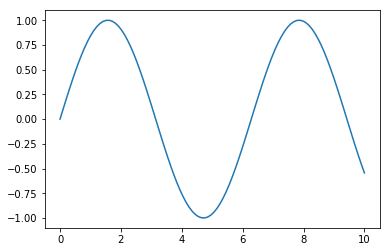

In [1]:
# we use a sub-module of matplotlib to plot 
# it is called "pyplot" and we import it as 'plt' for short.
import matplotlib.pyplot as plt

# we also import numpy as 'np' to creat example data.
import numpy as np

# this line tells jupyter notebookt that the plots 
# are to be shown directly in the notebook
%matplotlib inline

# generate a numpy array with 100 data points 
# between 0 and 10 for the x values
x = np.linspace(0,10,100)

# take the sine of the array as y values
y = np.sin(x)

# the plot() function takes two lists as arguments
# the x- and the y-coordinates and plots the corresponding points
plt.plot(x,y);

<a name="stuff"></a>Titel, axis, legend
---

Like this, our plot isn't very informative. We will now add a title, axis lables and a legend to make it more self-explanatory:

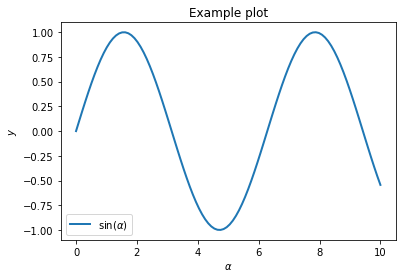

In [5]:
# set a string as the title
plt.title('Example plot')

# set the axis lables
plt.xlabel('$\\alpha$')
plt.ylabel('$y$')

# plot a curve and assign it a name
plt.plot(x,y, lw=2, label='$\\sin(\\alpha)$')

# add a legend that uses the name of the curve
plt.legend()

**Important:** We can use neat $\LaTeX$ symbols in the lables by encasing the string with $$ symbols.

<a name="stuff"></a>Another (Better) Way
---

Especially when we want to have more than one plot in one figure, there is the object-oriented way of creating figures in ```matplotlib```:

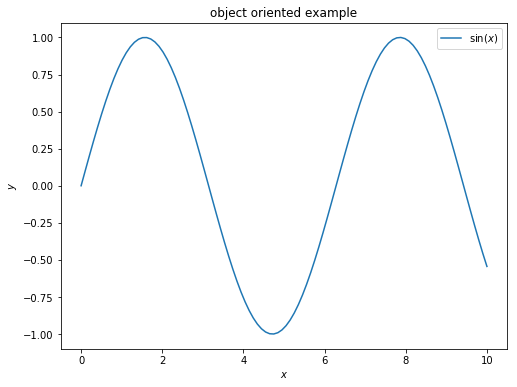

In [15]:
# create an empty figure
fig = plt.figure(figsize=(8,6))
# add an axis object
ax = fig.add_subplot(111)
# plotting happens inside the axis object ...
ax.plot(x,y, label='$\\sin(x)$')
# ... as does naming the axis.
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('object oriented example')
ax.legend()

For now, nothing changed, right?  Only the code seems more complicated.  The next example shows why the object-oriented way is useful: 

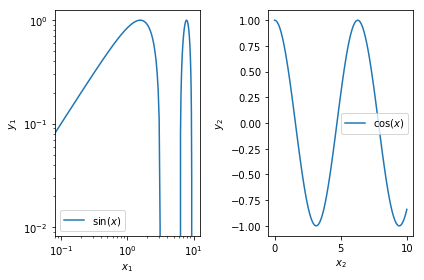

In [21]:
# create an empty figure again
# fig1 = plt.figure()
# now add two subplots in one row:
# ax1 = fig1.add_subplot(121)
# ax2 = fig1.add_subplot(122)
# equivalent, but only one line
fig1, axlist = plt.subplots(1,2)
ax1 = axlist[0]
ax2 = axlist[1]
# plot sine and cosine into separate plots
ax1.plot(x, y, label='$\\sin(x)$')
ax2.plot(x, np.cos(x), label='$\\cos(x)$')
# set axis labels and legends for both plot
ax1.set_xlabel('$x_1$')
ax2.set_xlabel('$x_2$')
ax1.set_ylabel('$y_1$')
ax2.set_ylabel('$y_2$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax2.legend()
# let matplotlib determine a nice layout
fig1.tight_layout()

In [13]:
a, b = 3,4
print(a, b)
b, a = a, b
print(a, b)

3 4
4 3


**Immportant**:  ```fig.tight_layout()``` works fine most of the time, but may in special cases messes up your plot.  Use it with caution.

<a name="felder"></a>Fields
---

Another handy function besides ```plot()``` is ```imshow()```. Imshow can display images.

In [22]:
# we need a special library to be able to load images:
# the Python Image Library (PIL)
from PIL import Image

# with the function 'Image' from PIL we can read 
# an image from file
img = Image.open('polygons.jpg')

# we convert the image to a NumPy array
img = np.asarray(img)

# img is a 3-d array of dimenions 816 x 1232 x 3
print(img.shape)

(816, 1232, 3)


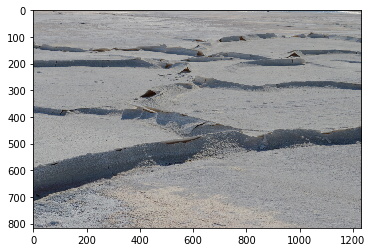

In [26]:
# now we display the images using imshow()
plt.imshow(img)

This works, since digital images can be interpreted as matrices. Every pixel has $(x,y)$ - coordinates and a grey value. If instead of a black-and-white image we have a colour image, there are three colour channels (red, green, blue) which together form the colour of the image.

The script we just used is a good example for the everyday programming life in Python: there are many, specialised functionalities. If we use these together, we can realise quite complicated results in few lines of code!

Nearly all scientific libraries accept ```NumPy``` arrays as arguments and nearly all data types can be converted to arrays, which makes life a lot easier!

<a name="anwendung"></a>Examples
===

Let's use the things we learned until now, to write a program that is pretty close to something we might use in science:

In [27]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

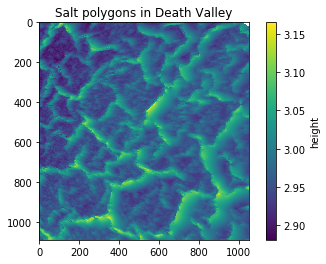

In [33]:
# load the data and visualize it to get an idea of it
data = np.loadtxt('polygons.txt')

plt.title('Salt polygons in Death Valley')
plt.imshow(data)
cbar = plt.colorbar()
cbar.set_label('height')

In [34]:
# calculate a few parameters to characterise the pattern
minimum = np.nanmin(data)
data = data - minimum

# since the data includes nan-values, we 
# have to use special functions which ignore these values
maximum = np.nanmax(data)
mean = np.nanmean(data)

# display the calculated values and format
# them to show only 2 figures after the decimal
print('maximum height: {:1.2f} m'.format(maximum))
print('mean height: {:1.2f} m'.format(mean))


maximum height: 0.28 m
mean height: 0.10 m


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


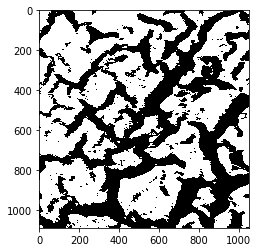

In [35]:
# filter the data to enhance the
# visibility of the pattern and visualize it
filtered_data = np.where(data >= mean, 1, 0)

# show the filtered data as a black-white image
plt.imshow(filtered_data, cmap=plt.get_cmap('Greys'))

## Further examples: google matplotlib gallery

<a name="uebung08"></a>Exercises 09: Plots
===

**Plots**
  1. Create an array x with 100 values between 0 and $2\pi$
  2. Create a second array with values $\cos(x)$ and a third with values $\cos(2x)$.
  3. Plot both curves in a plot over each other.
  Hint: if you call ```plot()``` twice in one cell, the curves get plotted into the same image.
  4. Add a title and axis lables.
  5. Lable both curves and add a legend to the plot.
  6. **(Optional)** look up the function ```plt.savefig()``` and use it to save your plot as a .pdf file.
  7. **(Optional)** Create a 100x100 array with a sinusodial value range in x-direction. Plot the array using ```imshow()```.

<a name="referenzen"></a>References
===

* Detailed and advanced Python course for beginners. Was used as the basis for this introductory course (uses jupyter notebooks as well): https://github.com/leriomaggio/python-in-a-notebook
* Tutorial for easy plotting using ```matplotlib```: https://matplotlib.org/users/pyplot_tutorial.html